## Reducing computational time

In [2]:
using Winston;
using Color;
import DSP
using PyPlot

In [3]:
include("../juwvid.jl")

juwvid

## WV

In [4]:
## sin FM 
nsample=1024
x,y,iw,ynorm=sampledata.genlinfm(nsample,1.0,0.01);
z=DSP.Util.hilbert(y);

In [11]:
tfrfc=cohenclass.tfrwv(z,NaN,NaN,NaN,NaN,0);

Single Wigner Ville
Use fft.


### Thinning time grids using 1 grid in 10 grids.

In [16]:
nthin=10
itc=collect(1:nthin:nsample);

In [10]:
tfrfi=cohenclass.tfrwv(z,NaN,NaN,NaN,itc,0);

Single Wigner Ville
Use fft.


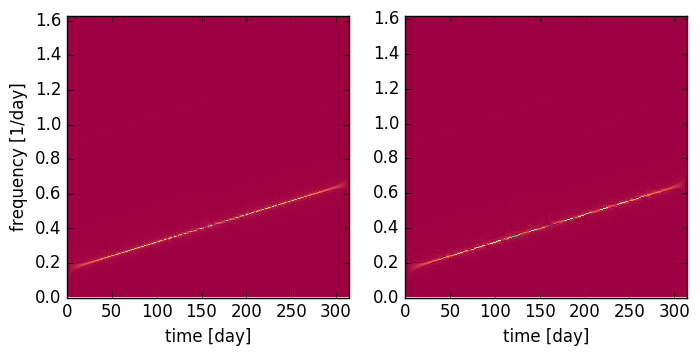

PyObject <matplotlib.text.Text object at 0x31f61a190>

In [17]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.tfrshow(abs(tfrfc),x[2]-x[1],x[1],x[end],NaN,NaN,1.0,"Spectral")
PyPlot.xlabel("time [day]")
PyPlot.ylabel("frequency [1/day]")
ax = fig[:add_subplot](1,2,2)
a=juwplot.tfrshow(abs(tfrfi),(x[2]-x[1])*nthin,x[1],x[end],NaN,NaN,1.0,"Spectral")
PyPlot.xlabel("time [day]")

### pseudo WV

In [57]:
## sin FM 
nsample=4096;
xs,ys,iws,ynorms=sampledata.genfm(nsample,2*pi,2*pi/100.0,30.0,365.0);
z=DSP.Util.hilbert(ys);

In [29]:
tfrpfc=cohenclass.tfrpwv(z);

Single pseudo Wigner Ville
Use fft.


In [58]:
### using 1 grid in 10 grids  
nthin=20
itc=collect(1:nthin:nsample);
tfrpfi=cohenclass.tfrpwv(z,NaN,NaN,NaN,itc,NaN,0);

Single pseudo Wigner Ville
Use fft.


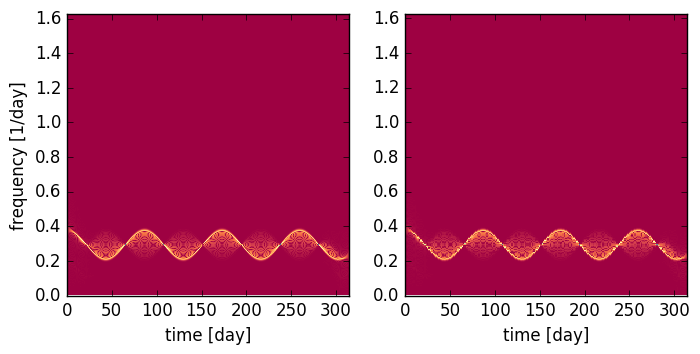

PyObject <matplotlib.text.Text object at 0x31ee2cad0>

In [31]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.tfrshow(abs(tfrpfc),x[2]-x[1],x[1],x[end],NaN,NaN,1.0,"Spectral")
PyPlot.xlabel("time [day]")
PyPlot.ylabel("frequency [1/day]")
ax = fig[:add_subplot](1,2,2)
a=juwplot.tfrshow(abs(tfrpfi),(x[2]-x[1])*nthin,x[1],x[end],NaN,NaN,1.0,"Spectral")
PyPlot.xlabel("time [day]")

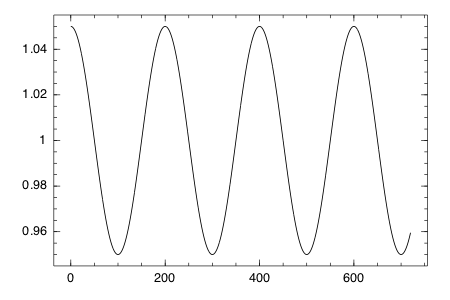

In [113]:
## sin FM 
nsample=4096;
xs,ys,iws,ynorms=sampledata.genfm(nsample,2*pi,2*pi/200.0,10.0,720.0);
z=DSP.Util.hilbert(ys);
Winston.plot(xs,iws/(2*pi))

In [114]:
juwutils.frequency_to_index([0.29,0.295], x[2]-x[1], nsample)

2-element Array{Int64,1}:
 731
 743

In [81]:
fin=collect(linspace(731,743,100))
tfrpfc=cohenclass.tfrpwv(z,NaN,NaN,fin);

Single pseudo Wigner Ville
Use nufft.


In [82]:
itc=collect(1:nthin:nsample);
tfrpfi=cohenclass.tfrpwv(z,NaN,NaN,fin,itc);

Single pseudo Wigner Ville
Use nufft.


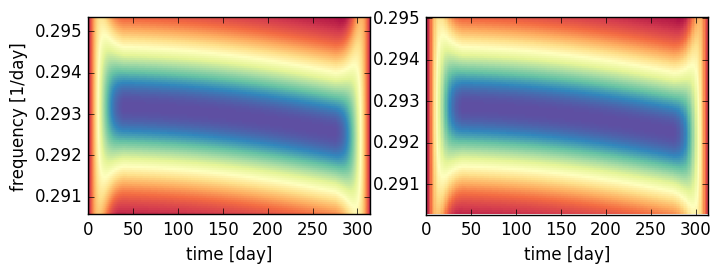

PyObject <matplotlib.text.Text object at 0x31be823d0>

In [83]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.tfrshow(abs(tfrpfc),x[2]-x[1],x[1],x[end],fin[1],fin[end],0.7,"Spectral")
PyPlot.xlabel("time [day]")
PyPlot.ylabel("frequency [1/day]")
ax = fig[:add_subplot](1,2,2)
a=juwplot.tfrshow(abs(tfrpfi),(x[2]-x[1])*nthin,x[1],x[end],fin[1],fin[end],0.7,"Spectral")
PyPlot.xlabel("time [day]")